In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

In [2]:
np.random.seed(18236900)

In [3]:
z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)
y = np.arange(4.5, 11, 1)

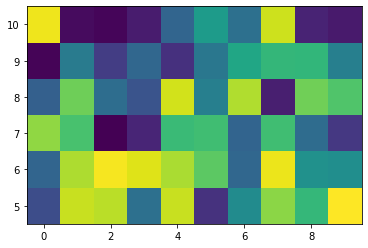

In [4]:
fig, ax = plt.subplots()
ax.pcolormesh(x, y, z)
plt.show()

In [5]:
x = np.arange(-0.5, 10, 1)
y = np.arange(4.5, 11, 1)

x, y = np.meshgrid(x, y)
x = x + 0.2 * y
y = y + 0.3 * x

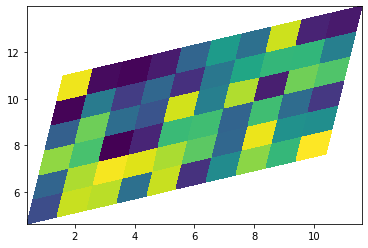

In [6]:
fig, ax = plt.subplots()
ax.pcolormesh(x, y, z)
plt.show()

In [7]:
x = np.arange(10)
y = np.arange(6)
x, y = np.meshgrid(x, y)

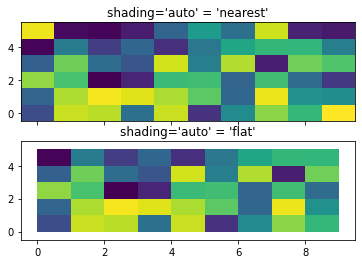

In [8]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

axs[0].pcolormesh(x, y, z, shading="auto", vmin=z.min(), vmax=z.max())
axs[0].set_title("shading='auto' = 'nearest'")

axs[1].pcolormesh(x, y, z[:-1, :-1], shading="auto", vmin=z.min(), vmax=z.max())
axs[1].set_title("shading='auto' = 'flat'")

plt.show()

In [9]:
# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
x, y = np.mgrid[1:5+dx:dx, 1:5+dy:dy]
z = np.sin(x) ** 10 + np.cos(10 + x * y) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds
# therefore, remove the last value from the z array
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels
cmap = plt.colormaps["PiYG"]
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

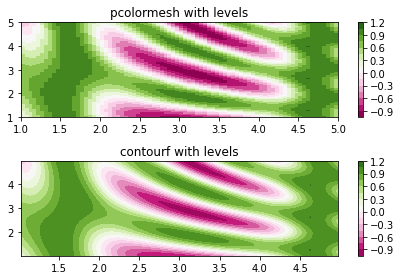

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2)

im = ax1.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax1)
ax1.set_title("pcolormesh with levels")

# contours are *point* based plots, so convert our bound into point centers
cf = ax2.contourf(x[:-1, :-1] + dx / 2, y[:-1, :-1] + dy / 2, z, levels=levels, cmap=cmap)
fig.colorbar(cf, ax=ax2)
ax2.set_title("contourf with levels")

# adjust spacing between subplots so `ax2` title and `ax1` tick labels don't overlap
fig.tight_layout()
plt.show()